In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
df = pd.read_csv("/Users/danielsoriano/Downloads/ds/extra data for projects/housing.csv", sep = ",")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [29]:
df['avg_people_living_home'] = df["population"] / df['households']
df['bedrooms_per_home'] = df['total_bedrooms'] / df['households']
df1 = df[['housing_median_age', 'households', 'median_income', 'median_house_value', 'ocean_proximity', 'avg_people_living_home', 'bedrooms_per_home']].copy()
df1

,housing_median_age,households,median_income,median_house_value,ocean_proximity,avg_people_living_home,bedrooms_per_home
0,41.0,126.0,8.3252,452600.0,NEAR BAY,2.555556,1.023810
1,21.0,1138.0,8.3014,358500.0,NEAR BAY,2.109842,0.971880
2,52.0,177.0,7.2574,352100.0,NEAR BAY,2.802260,1.073446
3,52.0,219.0,5.6431,341300.0,NEAR BAY,2.547945,1.073059
4,52.0,259.0,3.8462,342200.0,NEAR BAY,2.181467,1.081081
...,...,...,...,...,...,...,...
20635,25.0,330.0,1.5603,78100.0,INLAND,2.560606,1.133333
20636,18.0,114.0,2.5568,77100.0,INLAND,3.122807,1.315789
20637,17.0,433.0,1.7000,92300.0,INLAND,2.325635,1.120092
20638,18.0,349.0,1.8672,84700.0,INLAND,2.123209,1.171920


In [43]:
dfs = {}  
           
for category in df1['ocean_proximity'].unique():
    filtered_df = df1[df1['ocean_proximity'] == category]
    dfs[category] = filtered_df

NEAR_BAY = dfs['NEAR BAY']
NEAR_OCEAN = dfs['NEAR OCEAN']
OCEAN_1H = dfs['<1H OCEAN']
INLAND = dfs['INLAND']
ISLAND = dfs['ISLAND']

OCEAN_1H 

#df1 = df1.drop(['ocean_proximity'], axis=1)

KeyError: 'ocean_proximity'

In [44]:
df1

,housing_median_age,households,median_income,median_house_value,avg_people_living_home,bedrooms_per_home
0,41.0,126.0,8.3252,452600.0,2.555556,1.023810
1,21.0,1138.0,8.3014,358500.0,2.109842,0.971880
2,52.0,177.0,7.2574,352100.0,2.802260,1.073446
3,52.0,219.0,5.6431,341300.0,2.547945,1.073059
4,52.0,259.0,3.8462,342200.0,2.181467,1.081081
...,...,...,...,...,...,...
20635,25.0,330.0,1.5603,78100.0,2.560606,1.133333
20636,18.0,114.0,2.5568,77100.0,3.122807,1.315789
20637,17.0,433.0,1.7000,92300.0,2.325635,1.120092
20638,18.0,349.0,1.8672,84700.0,2.123209,1.171920


In [45]:
## SPLITTING THE DATA
from sklearn.model_selection import train_test_split
features = df1[['housing_median_age', 'households', 'median_income', 'avg_people_living_home', 'bedrooms_per_home']]
target = df1['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [46]:
## CLEANING DATA
import pandas as pd
from sklearn.model_selection import train_test_split

def clean_and_split_data(df, target_column, test_size=0.2, rolling_window=5, std_threshold=2):
    rolling_std = df.rolling(window=rolling_window).std()

    outliers = (df - rolling_std * std_threshold) < 0

    cleaned_df = df[~outliers.any(axis=1)]

    features = cleaned_df.drop(columns=[target_column])
    target = cleaned_df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=42)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = clean_and_split_data(df1, 'median_house_value')

In [47]:
## SCALING DATA
from sklearn.preprocessing import StandardScaler

def scale_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

In [53]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

def predict_median_house_value(df):
    # Initialize DataFrame to store predictions
    df_pred = pd.DataFrame()

    # Selecting features and target
    features = df.drop(columns=['median_house_value'])
    target = df['median_house_value']

    # Scale the data
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Create XGBoost model
    model = XGBRegressor()

    # Fit the model
    model.fit(features_scaled, target)

    # Make predictions
    predictions = model.predict(features_scaled)

    # Store predictions in df_pred DataFrame
    df_pred['median_house_value_predicted'] = predictions

    return df_pred

# Example usage:
# Assuming df1 is your DataFrame containing the data
df_pred = predict_median_house_value(df1)

# Optionally, you may print the df_pred DataFrame to inspect the predicted values
print("DataFrame with Predicted Values:")
df_pred

DataFrame with Predicted Values:


,median_house_value_predicted
0,438846.406250
1,381700.000000
2,426098.656250
3,387905.312500
4,298027.593750
...,...
20635,70282.781250
20636,101704.265625
20637,95478.898438
20638,130068.882812


In [55]:
df1

,housing_median_age,households,median_income,median_house_value,avg_people_living_home,bedrooms_per_home
0,41.0,126.0,8.3252,452600.0,2.555556,1.023810
1,21.0,1138.0,8.3014,358500.0,2.109842,0.971880
2,52.0,177.0,7.2574,352100.0,2.802260,1.073446
3,52.0,219.0,5.6431,341300.0,2.547945,1.073059
4,52.0,259.0,3.8462,342200.0,2.181467,1.081081
...,...,...,...,...,...,...
20635,25.0,330.0,1.5603,78100.0,2.560606,1.133333
20636,18.0,114.0,2.5568,77100.0,3.122807,1.315789
20637,17.0,433.0,1.7000,92300.0,2.325635,1.120092
20638,18.0,349.0,1.8672,84700.0,2.123209,1.171920


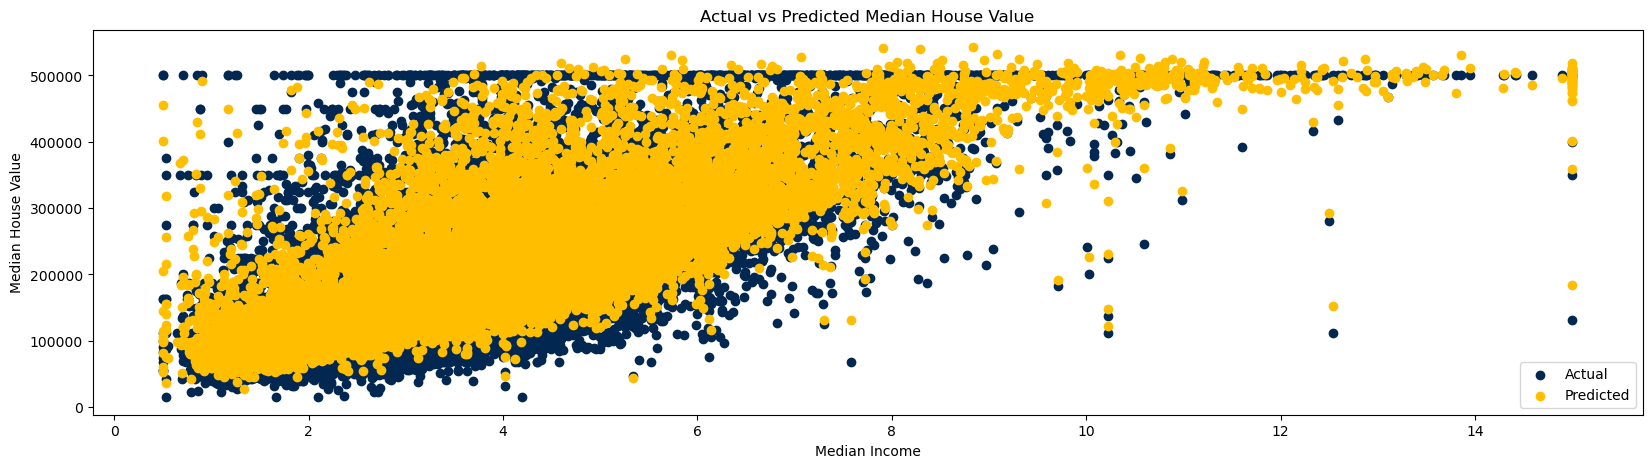

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

plt.scatter(df1['median_income'], df1['median_house_value'], label='Actual', color='#022851')
plt.scatter(df1['median_income'], df_pred['median_house_value_predicted'], label='Predicted', color='#FFBF00', alpha=1)

plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Actual vs Predicted Median House Value')
plt.legend()

plt.show()
